# **Maestría en Inteligencia Artificial Aplicada**

Entrega: **Actividad 4. Práctica: PCA**

Nombre del estudiante: **JESUS ESTEINER ALONSO MORENO**

Matrícula: **A01793554**

Materia: **Ciencia de Datos**

Profesor: **Jobish**

Fecha: **11 de Octubre 2022**



# **Objetivo:**

**Realizar la reducción de características de un conjunto de datos para encontrar sus componentes principales y mejorar su interpretabilidad con la menor pérdida de información posible.**

## **Parte 1**

Paso 1.1: Realiza una descripción y resume el entendimiento sobre conceptos de componentes principales. Determina el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos.


In [ ]:
# Importar las librerias
import pandas as pd
import numpy as np

# Dataset proveido por el profesor.
url='https://raw.githubusercontent.com/tec03/Datasets/main/datasets/Cereals.csv'
cereals_df = pd.read_csv(url)

# Trabajaremos sobre un DataFrame de copia para no tocar los datos originales
df = cereals_df.copy()

# Iniciamos la transformación
# Limpiar los valores vacíos, PCA necesita tener los datos limpios
df.dropna(axis=0, inplace=True)
df


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
5,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


Veamos la estructura de nuestro DataSet para conocer el nombre de las columnas que tenemos en el archivo, para ello usaremos el objeto info del DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      74 non-null     object 
 1   mfr       74 non-null     object 
 2   type      74 non-null     object 
 3   calories  74 non-null     int64  
 4   protein   74 non-null     int64  
 5   fat       74 non-null     int64  
 6   sodium    74 non-null     int64  
 7   fiber     74 non-null     float64
 8   carbo     74 non-null     float64
 9   sugars    74 non-null     float64
 10  potass    74 non-null     float64
 11  vitamins  74 non-null     int64  
 12  shelf     74 non-null     int64  
 13  weight    74 non-null     float64
 14  cups      74 non-null     float64
 15  rating    74 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


Los tipos de variable en el listado anterior ya nos permite iniciar determinando cuáles de estas columnas son númericas (int, float), o de texto, u objeto las que determinaremos son **CATEGORICAS**.  Así entonces extraigamos solo las variables númericas *df.iloc[:,3:]*

**dtypes: float64(7), int64(6), object(3)**


In [ ]:
# Tomando el listado anterior, vemos que con el índice de la primera column
# podemos determinar que desde la 3 en adelante son númericas.  Así que generemos
# un nuevo Dataframe con los datos numéricos.
df_num = df.iloc[:,3:]

# Muestranos las columnas seleccionadas
df_num.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
5,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541


Iniciando nuestro proceso de análisis PCA recordemos que esta técnica busca reducir el número de factores o variables, columnas de un conjunto de datos con el objetivo de minimizar el costo de procesamiento de computo.

Dentro de este aspecto, PCA aplica cuando hay demasiadas variables que analizar y queremos **reducir** ese número de variables, sin perder la información o comportamiento de los datos, adicionalmente, para poder llegar a reducir ese número de variables **(dimension)** debemos interpretar primero cuáles variables nos están dando la misma información, es decir, tienen una alta **correlación**

Un ejemplo de dicha correlación puede ser, variable x = (salario de un empleado) y y = (número de horas trabajadas), en contexto, si trabaja más horas, sube el salario y su opuesto, por lo que estas dos variables podemos decir, tienen alta correlación.

Veámos la correlación de nuestro set de datos:

Antes de continuar viendo la correlación, que usaremos en nuestro último DataFrame *df_num* ya que contiene solo las columnas numéricas, procederemos a importar una librería de python que nos permita gráficamente poder determinar por una imagen de calor, qué variables tienen más o menor correlación.

Veámos entonces:

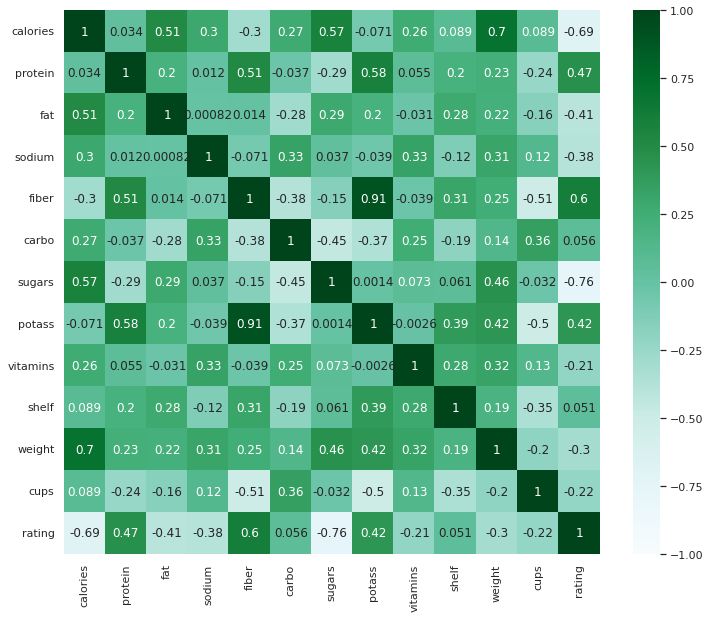

In [ ]:
# librería para realizar el mapa de calor
import seaborn as sns

# correlación de nuestra información
corrs = df_num.corr()

# configurar el tipo de imagen
sns.set(rc = {'figure.figsize':(12,10)})
sns.heatmap(corrs, vmin = -1, vmax = 1, cmap = "BuGn", annot = True)


Observamos el mapa de calor, y el color más oscuro nos muestro mayor correlación, mientras que las de menor o color más claro que no hay o tiene muy poca correlación.

Los cuadros con mayor correlación o **correlación positiva** nos muestran datos como que el potasio y la fibra tienen mucha correlación entre si, y opuestamente, azucares y rating muy poca relación, o **correlación negativa**

*La interpretación de una matriz de correlación puede resultar difícil con datos grandes. A veces, ordenar los valores de correlación ayuda a ver fácilmente el grado de dependencia de varios pares de variables.*

Ahora, para ordenar la matriz de correlación, primero tenemos que convertir la matriz a una serie unidimensional. La función unstack() se usa para hacerlo. La serie tendrá índice múltiple. 

*REFERENCIA:  https://es.acervolima.com/ordenar-matriz-de-correlacion-en-python/*

Veámos: 


In [ ]:
# ordenamos la matriz de correlación de menor a mayor correlación
sorted_mat = corrs.unstack().sort_values()

# imprima el total de datos de la matriz de correlación
sorted_mat.head(1000)


sugars    rating     -0.755955
rating    sugars     -0.755955
          calories   -0.693785
calories  rating     -0.693785
fiber     cups       -0.513697
cups      fiber      -0.513697
potass    cups       -0.501688
cups      potass     -0.501688
carbo     sugars     -0.452069
sugars    carbo      -0.452069
rating    fat        -0.405050
fat       rating     -0.405050
rating    sodium     -0.383012
sodium    rating     -0.383012
carbo     fiber      -0.379084
fiber     carbo      -0.379084
potass    carbo      -0.365003
carbo     potass     -0.365003
cups      shelf      -0.351034
shelf     cups       -0.351034
weight    rating     -0.300461
rating    weight     -0.300461
fiber     calories   -0.295212
calories  fiber      -0.295212
protein   sugars     -0.286584
sugars    protein    -0.286584
carbo     fat        -0.284934
fat       carbo      -0.284934
cups      protein    -0.242099
protein   cups       -0.242099
rating    cups       -0.222504
cups      rating     -0.222504
rating  

Habiendo usado ya las dos técnicas para búsqueda de las correlaciones, observamos y podemos concluir que:

**fiber  y   potass      0.911504 - Alta correlación**

**sugars  y  rating     -0.755955 - Menor correlación**

**Esto nos indica que si dos variables están muy correlacionadas el modelo tiene información redundante, o repetida.**


Continuemos con el estudio y preparación de nuestros datos para que PCA nos aporte el mayor beneficio.  Para ello, empecemos por determinar o conocer la varianza de alguno de nuestras variables y las analizamos:


In [ ]:
# Datos de los que extraeremos sus varianzas, min, max para estudio
cols = ['fiber', 'calories', 'protein', 'sodium' ]

# Organizar estos datos en un Dict para luego mostrarlas ordenas
# en un DataFrame
df_dict = {"Varianza": df_num[cols].var(),
           "Valor Min:": df_num[cols].min(),
           "Valor Max:": df_num[cols].max()}

# Presentemos los datos cambiando las filas a columnas y su contrario.
pd.DataFrame(df_dict, index = cols).transpose()


,fiber,calories,protein,sodium
Varianza,5.872825,393.780081,1.157349,6850.837653
Valor Min:,0.000000,50.000000,1.000000,0.000000
Valor Max:,14.000000,160.000000,6.000000,320.000000


Lo fenomenal de este método, es que entendiendose que la varianza nos indica la proporción de información que existe en cada variable podemos inicialmente argumentar que las calorías son las que mayor información tiene, sin embargo, hay que tener muy en cuenta que esta varianza está afectada por la magnitud de cada una de las variables.

El máximo de sodium es de 320 mientras que el máximo de las proteinas es solo 6, desde ese punto de vista, el valor absoluto no nos permite identificar claramente qué variables tienen mayor importancia dentro del conjunto de datos, de tal manera, que debemos llevarlo a un valor de % con respecto a la varianza total y cruzarlas con cada una de las variables para determinar su participación en el total del conjunto de datos.

Veamos como:


In [ ]:
# Para determinar el % de varianza respecto al total de variables
# por supuesto necesitamos calcular la varianza total en primera instancia.
var_tot = df_num.var().sum()

# Ahora calculemos las varianzas de las variables que usamos en el ejercicio
# anterior
var_fib = df_num.fiber.var()
var_cal = df_num.calories.var()
var_pro = df_num.protein.var()
var_vit = df_num.sodium.var()

# Ahora si veamos cuál es el valor representativo de cada variables respecto
# al total de la varianza, y allí podremos determinar qué variable nos trae
# o no, o representa un nivel mayor de información.
print('Varianza Total \t\t:',var_tot.round(2) )
print('Varianza Fibra \t\t:', ((var_fib/var_tot)*100).round(2),'%' )
print('Varianza Calorías \t:', ((var_cal/var_tot)*100).round(2),'%' )
print('Varianza Proteina \t:', ((var_pro/var_tot)*100).round(2),'%' )
print('Varianza Sodium \t:', ((var_vit/var_tot)*100).round(2),'%' )


Varianza Total 		: 13005.35
Varianza Fibra 		: 0.05 %
Varianza Calorías 	: 3.03 %
Varianza Proteina 	: 0.01 %
Varianza Sodium 	: 52.68 %


Con los datos anteriores, a primera vista se podría deducir que el Sodium es el que mayor información contiene en el conjunto de datos, pues su varianza es 52.68%, muy por encima de las demás.   Sin embargo, de nuevo, debe aclararse que ese % solo nos está indicando que su rango de magnitudes es mucho mayor.  

Para reducir esas varianzas existe un proceso que llamamos **escalar los datos**, proceso que podemos trabajarlo con python.

Recordemos entonces que existen dos técnicas que son las más populares para escalar datos numéricos antes del modelado, son la **normalización y la estandarización**. 

#**La normalización** 
La normalización es un cambio de escala de los datos del rango original para que todos los valores estén dentro del nuevo rango de 0 y 1.

Así entonces, escalamos cada variable de entrada por separado al rango 0-1, que es el rango para los valores de punto flotante donde tenemos la mayor precisión. 

Un valor se normaliza de la siguiente manera:

y = (x – min) / (max – min)

Donde los valores mínimo y máximo pertenecen al valor x que se está normalizando.

Por ejemplo, para un conjunto de datos, podríamos estimar los valores observables mínimo y máximo como 30 y -10. Entonces podemos normalizar cualquier valor, como 18.8, de la siguiente manera:

y = (x – min) / (max – min)
y = (18,8 – (-10)) / (30 – (-10))
y = 28,8 / 40
y = 0,72

#**La estandarización** 
La estandarización implica volver a escalar la distribución de valores para que la media de los valores observados sea 0 y la desviación estándar sea 1.

Esto se puede considerar como restar el valor medio o centrar los datos.

Al igual que la normalización, la estandarización puede ser útil e incluso requerida en algunos algoritmos de aprendizaje automático cuando sus datos tienen valores de entrada con diferentes escalas.

Un valor se estandariza de la siguiente manera:

*y = (x – media) / desviación_estándar*

Donde la media se calcula como:

*media = suma(x) / cuenta(x)*

Y la desviación_estándar se calcula como:

*desviación_estándar = raíz cuadrada (suma ((x – media) ^ 2) / cuenta (x))*

Podemos estimar una media de 10,0 y una desviación estándar de alrededor de 5,0. Usando estos valores, podemos estandarizar el primer valor de 20.7 de la siguiente manera:

y = (x – media) / desviación_estándar
y = (20.7 – 10) / 5
y = (10.7) / 5
y = 2.14

Las estimaciones de la media y la desviación estándar de un conjunto de datos pueden ser más sólidas para los nuevos datos que el mínimo y el máximo.

Si quisieramos estandarizar nuestro conjunto de datos lo podemos hacer utilizando el objeto **StandardScaler** de scikit-learn .

Si por el contrario, queremos normalizar nuestro conjunto de datos con Python podemos hacerlo con el objeto **MinMaxScaler** de scikit-learn.

Como nuestro objetivo es disminuir la magnitud con PCA, aplicaremos la estandarización en nuestro ejercicio.

REFERENCIA: https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/


In [ ]:
from sklearn.preprocessing import StandardScaler

# Estandarizando....
scaler = StandardScaler()

# Usaremos nuestros df_num
scaled = scaler.fit_transform(df_num)

# Resultado mostrado ordenadamente en un dataframe
scaled_df = pd.DataFrame(scaled, columns=df_num.columns)
scaled_df.head()



,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,-1.878652,1.391180,0.0,-0.393692,3.250706,-2.517206,-0.255940,2.578001,-0.183083,0.948401,-0.202203,-2.099895,1.867565
1,0.658214,0.455295,4.0,-1.792572,-0.072986,-1.741067,0.206001,0.518288,-1.312098,0.948401,-0.202203,0.761919,-0.601791
2,-1.878652,1.391180,0.0,1.187651,2.835245,-1.999780,-0.486911,3.146198,-0.183083,0.948401,-0.202203,-2.099895,1.223491
3,-2.893399,1.391180,-1.0,-0.272050,4.912553,-1.741067,-1.641763,3.288247,-0.183083,0.948401,-0.202203,-1.373763,3.682812
4,0.150841,-0.480589,1.0,0.214517,-0.280717,-1.094285,0.667942,-0.405032,-0.183083,-1.471657,-0.202203,-0.305922,-0.922781


Los datos anteriores ya los podemos observar que fueron estandarizados, y podemos verlos en una sola escala, es decir, tuvieron que reducirse a un mismo valor en su varianza.

Comprobemos este dato revisando las varianzas nuevamente:

At this point it would be convinient to analyze our dataset's variance before and after normalization to double check that scaling it through Min Max was actually convenient. 

In [ ]:
# Datos de los que extraeremos sus varianzas, min, max para estudio
cols = ['fiber', 'calories', 'protein', 'sodium' ]

# Organizar estos datos en un Dict para luego mostrarlas ordenas
# en un DataFrame
df_dict = {"Varianza": scaled_df[cols].var(),
           "Valor Min:": scaled_df[cols].min(),
           "Valor Max:": scaled_df[cols].max()}

# Presentemos los datos cambiando las filas a columnas y su contrario.
pd.DataFrame(df_dict, index = cols).transpose()

,fiber,calories,protein,sodium
Varianza,1.013699,1.013699,1.013699,1.013699
Valor Min:,-0.903910,-2.893399,-1.416474,-1.975034
Valor Max:,4.912553,2.687707,3.262949,1.917501


Con los valores ya estandarizados, podemos ahora si continuar con la aplicabilidad del PCA.

Recordemos que el PCA es un importante método de aprendizaje automático para la reducción de la dimensionalidad y se denomina análisis de componentes principales (PCA en inglés)

PCA es un método que utiliza operaciones matriciales simples de álgebra lineal y estadística para calcular una proyección de los datos originales en el mismo número o menos dimensiones.

El proceso de PCA nos ayuda a identificar aquellas direcciones en las que la varianza es mayor. 

Como la varianza de una variable se mide en su misma escala elevada al cuadrado, si antes de calcular las componentes no se *estandarizan* todas las variables para que tengan media 0 y desviación estándar 1, aquellas variables cuya escala sea mayor dominarán al resto. De ahí que sea recomendable estandarizar siempre los datos.

Apliquemos el método PCA para reducción de la dimensionalidad y veamoslo implementado ahora ya con los datos preparados, limpios, y estandarizados.

REFERENCIA: https://www.cienciadedatos.net/documentos/35_principal_component_analysis


In [58]:
from sklearn.decomposition import PCA

pca = PCA()
pca_t = pca.fit_transform(scaled_df)

# Se combierte el array a dataframe para añadir nombres a los ejes.
pca_df = pd.DataFrame(pca_t, columns = df_num.columns)
pca_df

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,5.746995,-1.187545,-0.983893,0.421067,-1.176490,-0.972466,-0.223206,-0.243515,-0.135080,0.049433,0.250305,0.010701,1.022141e-08
1,0.411657,-1.869310,-2.901420,-0.858535,3.271532,-0.681940,-0.962611,0.903571,-0.841989,-0.594658,0.067248,-0.094692,1.651188e-09
2,5.167720,-1.504111,-0.102637,0.169396,-1.559672,-1.996801,0.415834,0.186687,0.140228,0.084262,-0.517210,-0.014985,1.473264e-08
3,7.856202,0.241896,0.676601,0.467311,-1.770340,-0.781378,-0.698801,0.869826,-0.685784,0.107987,0.738824,0.076199,-1.928351e-08
4,-1.039034,-0.365354,-1.466490,-0.909753,-0.407840,-0.896077,-0.006820,-0.794098,-0.744350,-0.098973,0.099616,-0.080442,1.728972e-08
5,-1.386844,0.292728,-1.430307,0.326090,-0.942848,0.460412,-0.972463,-0.231099,0.909465,0.158697,0.394847,0.021612,-1.992068e-08
6,-0.582505,-2.163005,0.980263,-0.477141,0.706968,0.637267,0.740762,0.552581,0.244577,-0.728079,0.306022,0.209623,1.173389e-08
7,0.749395,0.704409,0.033050,-0.817431,-1.121459,-0.520435,0.432546,-0.278457,-1.096713,0.075023,-0.023395,0.371659,3.653928e-09
8,2.312815,-0.035402,0.478300,0.547918,-0.901299,-0.438266,0.289164,0.547345,0.630889,0.195545,-0.244042,-0.197996,7.339841e-09
9,-2.383796,-0.847385,-1.652683,0.060050,-0.259208,-0.817190,0.812282,-0.050536,-0.275443,0.045865,0.089606,-0.041371,1.004139e-08


Una vez aplicado a nuestro conjunto de datos el método PCA, evaluemos los resultados del mismo.   Recordemos que el objetivo es reducir el nivel de dimensionalidad y para ello contamos con un simple ejercicio.  

* Verificar el % de varianza aplicada nuevamente a cada uno de los datos
* Verificar el total acumulado de la varianza por cada dato.


In [62]:
# Varianza explicada por cada una de las variables
explained_var = np.round(pca.explained_variance_ratio_,4) * 100

# Varianza acumulada por cada una de las variables
acumulated_var = np.cumsum(pca.explained_variance_ratio_) * 100

pcaSummary_df = pd.DataFrame({'% varianza explicada': explained_var,
                              '% varianza acumulada': acumulated_var})

# Etiquetemos los componentes creados por PCA para tener mayor visibilidad
pca_labels = [f'PC{i + 1}' for i in range(len(scaled_df.columns))]
pcaSummary_df.index = pca_labels

# Presentemos los datos cambiando las filas a columnas y su contrario.
pcaSummary_df.transpose()

# Mostrar
pcaSummary_df

,% varianza explicada,% varianza acumulada
PC1,27.95,27.950814
PC2,24.22,52.166619
PC3,14.69,66.853923
PC4,7.84,74.696047
PC5,7.61,82.306507
PC6,5.55,87.860828
PC7,5.17,93.026339
PC8,3.20,96.228053
PC9,2.43,98.656930
PC10,0.71,99.363190


Determinar cuáles fueron las mejores componentes no existe un criterio único, pero si podemos al analizar la tabla anterior de las varianzas acumuladas que tomando como referencia un pareto, las primeras 5 componentes soportan más del 90%, en nuestro caso, 93.03% de la varianza acumulada.

El siguiente punto una vez selecciona una referencia de variables es determinar cuántas *variables originales* acumulaban ese 93%.

Veamos:


In [63]:
# Varianza total de las variables
total_var = scaled_df.var().sum()

pd_var_ori = pd.DataFrame({"Porcentaje Varianza": (scaled_df.var()/ total_var) * 100,
                           "Porcentaje Varianza Acumulado": (scaled_df.var().cumsum() / total_var) * 100 })
pd_var_ori

,Porcentaje Varianza,Porcentaje Varianza Acumulado
calories,7.692308,7.692308
protein,7.692308,15.384615
fat,7.692308,23.076923
sodium,7.692308,30.769231
fiber,7.692308,38.461538
carbo,7.692308,46.153846
sugars,7.692308,53.846154
potass,7.692308,61.538462
vitamins,7.692308,69.230769
shelf,7.692308,76.923077


#Paso 2: Interprete cada componente principal en términos de las variables originales

Aquí podemos ya obtener el beneficio del método de PCA aplicado, alcanzar un 93%, nos indica que solo con 7 variables podemos alcanzar ese mismo nivel de varianza, en lugar de usar 13 variables.   Así, observamos que estamos reduciendo considerablemente el número de variables que utilizaríamos para entrenar el modelo, acelerando considerablemente el proceso y el costo computacional.

Veamos las primeras 7 componentes cómo están distribuidas en la mayoría de la información:


In [66]:
comps_df = pd.DataFrame(pca.components_.round(4), columns = pca_labels, index = scaled_df.columns)
comps_df.iloc[:,:7]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
calories,-0.2995,0.3074,-0.0399,-0.1834,0.4535,-0.1924,-0.2281
protein,-0.3931,-0.1653,-0.3457,-0.1372,-0.1798,0.1494,-0.3514
fat,0.1149,0.2773,-0.2049,0.3894,0.0698,0.5625,-0.3554
sodium,-0.2044,-0.3007,-0.1868,-0.1203,-0.0392,-0.0878,0.0227
fiber,0.2039,0.3197,0.5869,-0.3384,-0.2551,0.1827,-0.3149
carbo,0.2559,-0.1208,-0.3480,-0.6644,-0.0642,0.3264,0.1521
sugars,0.0256,-0.2827,0.0512,0.2837,-0.1123,0.2605,-0.2280
potass,-0.0025,-0.4266,0.0631,0.1767,0.2162,0.1674,-0.0631
vitamins,0.0299,0.5347,-0.4597,0.2151,-0.2443,-0.1168,0.2254
shelf,0.4995,-0.0216,-0.1451,-0.0011,0.2951,0.2406,0.2517


En la tabla anterior podemos determinar cuál es el peso de cada uno de los componentes en relación con cada una de las variables.

Mostremos entonces los valores máximos por cada fila, pues así podremos determinar, qué componente es el que determina esa relación de mayor información en el conjunto de datos.


In [67]:
comps_df.iloc[:,:7].idxmax() #Nos interesa buscar los máximos por filas, no por␣columnas. Por eso usamos idxmax

PC1       shelf
PC2    vitamins
PC3       fiber
PC4         fat
PC5      weight
PC6         fat
PC7        cups
dtype: object

La variable *shelf* es la que mayor influye en la información, y en el orden descendiente las demás, es decir, *vitamins* es la segunda que más contribuye a esta varianza.  Un punto importante es llamar la atención que la variable *fat* influye directamente en dos componentes, PC4 y PC6.


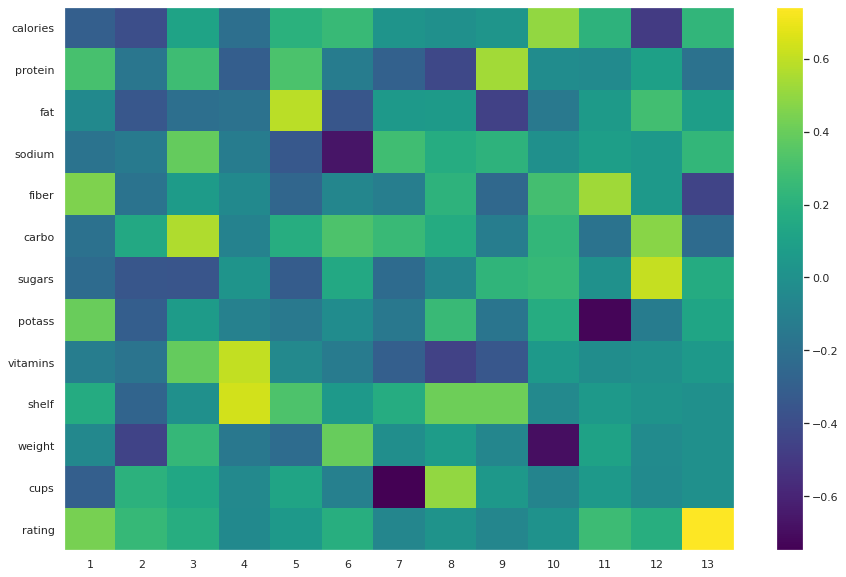

In [50]:
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style

# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
componentes = pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(df_num.columns)), df_num.columns)
plt.xticks(range(len(df_num.columns)), np.arange(pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

Por último, determinemos los valores de varianza con las variables originales y los componentes:

In [71]:
print("Varianza total variables originales: ", scaled_df.var().sum())
print("Varianza total de los componentes: ", pca_df.var().sum())


Varianza total variables originales:  13.17808219178082
Varianza total de los componentes:  13.178082191780799


Esta información de las varianzas ratifica una vez más, que la información no se perdió, solo se ha organizado y priorizado de forma diferente.

###Paso 3: Identifique valores atípicos

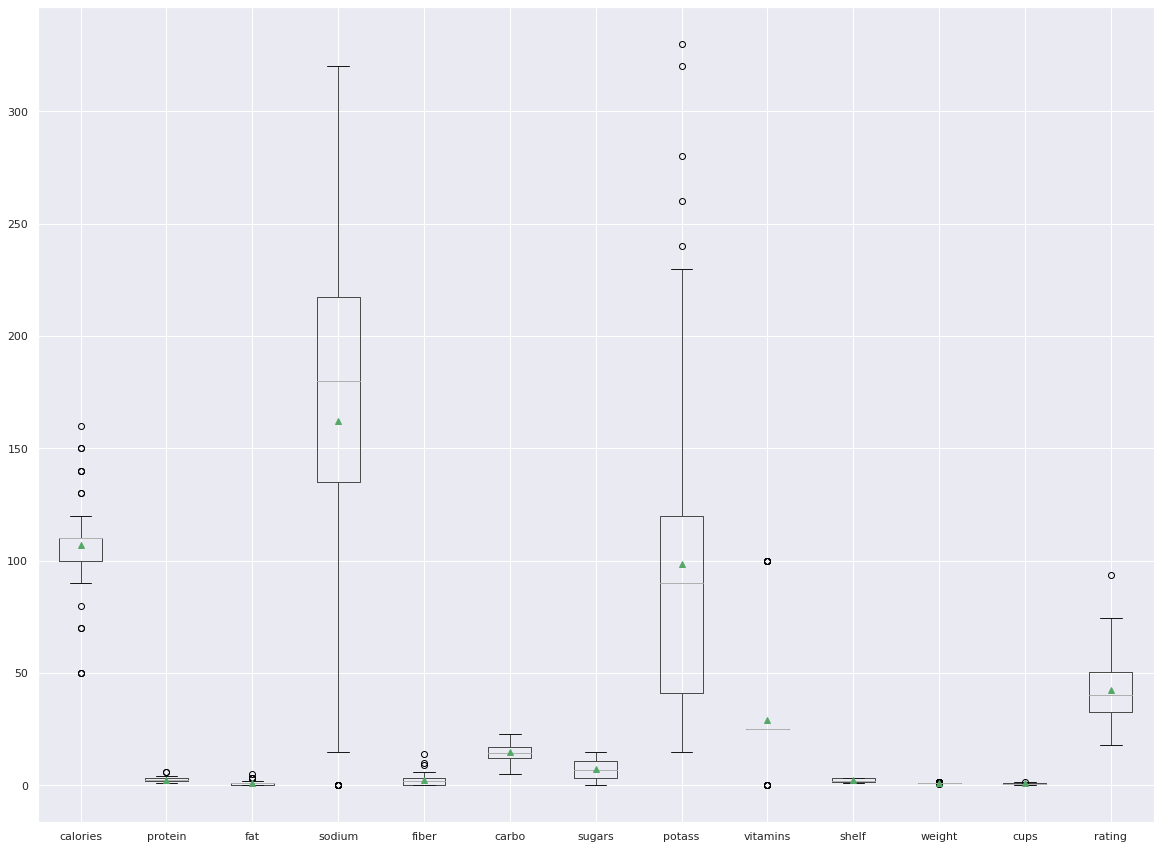

In [69]:
outliers=df_num.boxplot(figsize = (20,15), showmeans=True)
outliers.plot()

plt.show()

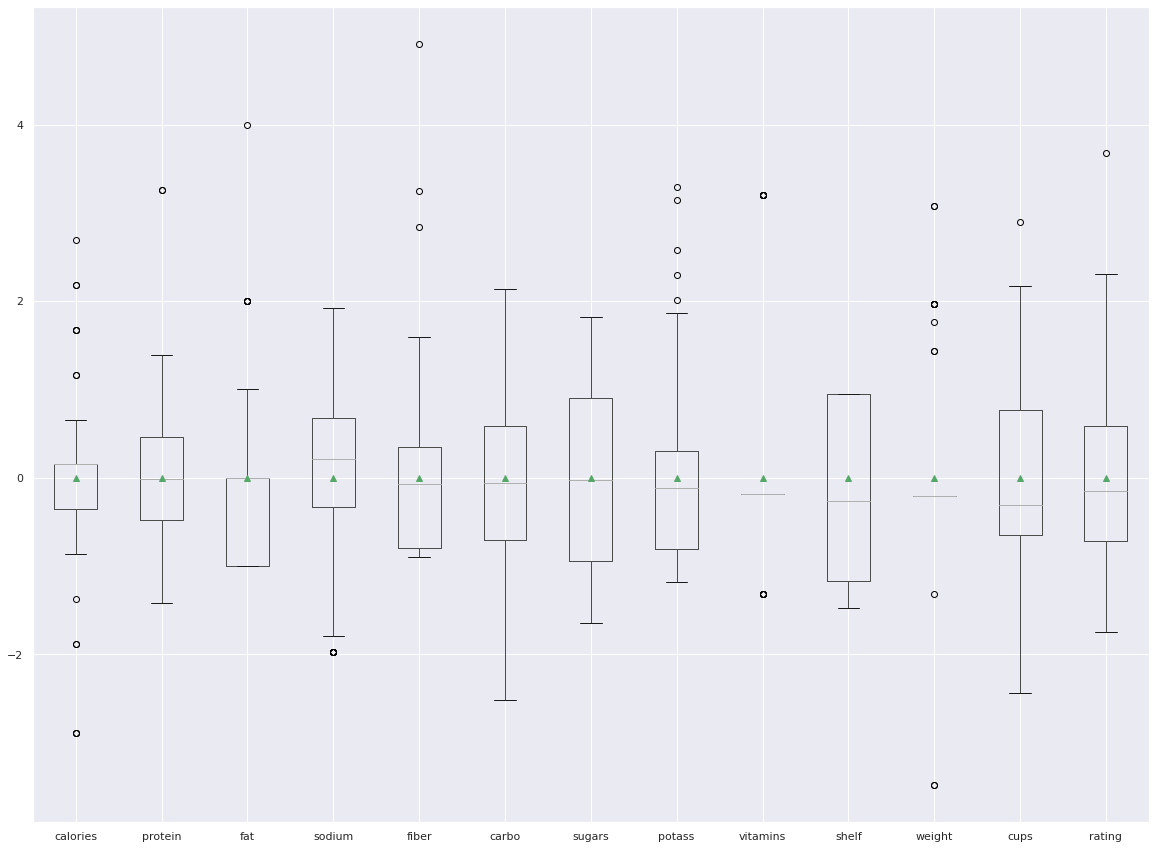

In [72]:
scaled_outliers = scaled_df.boxplot(figsize = (20,15), showmeans=True)
scaled_outliers.plot()

plt.show()

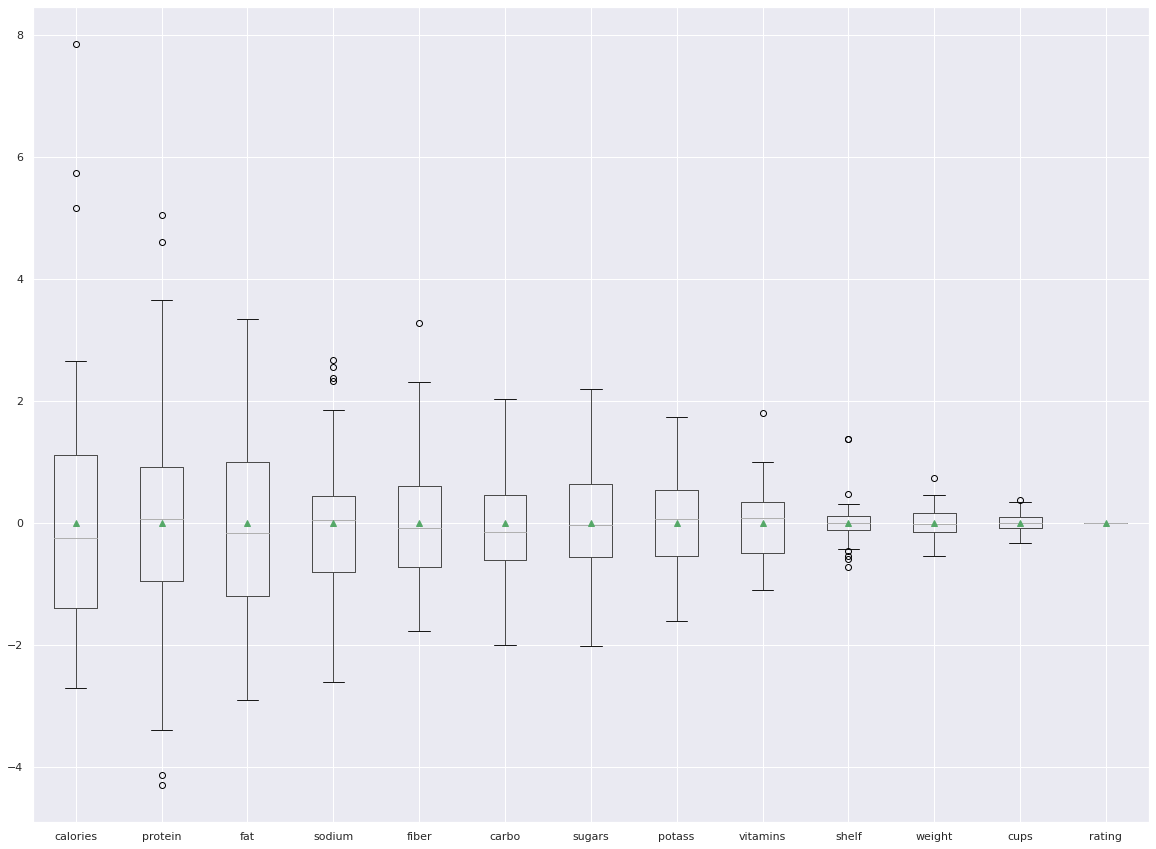

In [73]:
scaled_outliers=pca_df.boxplot(figsize = (20,15), showmeans=True)
scaled_outliers.plot()

plt.show()

#Parte 2


1. **¿Cuál es el número de componentes mínimo y por qué?**

El mínimo numero de componentes es relativo de acuerdo a la información que estemos buscando, sin embargo, luego de aplicar PCA y mantener en tan solo 7 componentes la explicación por más del 92% de la información, es excelente método, pues cumple el objetivo de reducir la complejidad y dimensionalidad para acelerar el entrenamiento.


2. **¿Cuál es la variación de los datos que representan esos componentes?**

Tan solo con los primeros 7 componentes se representa más del 92.30% de la información.

3. **¿Cuál es la pérdida de información después de realizar PCA?**

Al aplicar PCA los componentes mantienes la información de las variables originales sin perdida de información, la varianza de las variables originales y los componentes se mantuvo exactamente igual, 13.17%.

4. **De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?**

La de mayor importancia es el SHELF y el FAT pues este último es afectado por dos compoenentes, sin embargo el CUPS

PC1       shelf
PC2    vitamins
PC3       fiber
PC4         fat
PC5      weight
PC6         fat
PC7        cups

5. **¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**

Recordemos que el PCA es un importante método de aprendizaje automático para la reducción de la dimensionalidad buscando minimizar el número de factores o variables, columnas de un conjunto de datos con el objetivo de reducir el costo de procesamiento de computo.

Dentro de este aspecto, PCA aplica cuando hay demasiadas variables que analizar y queremos reducir ese número de variables, sin perder la información o comportamiento de los datos, adicionalmente, para poder llegar a reducir ese número de variables (dimension) debemos interpretar primero cuáles variables nos están dando la misma información, es decir, tienen una alta correlación

Un ejemplo de dicha correlación puede ser, variable x = (salario de un empleado) y y = (número de horas trabajadas), en contexto, si trabaja más horas, sube el salario y su opuesto, por lo que estas dos variables podemos decir, tienen alta correlación.